# The following is my implementation of Q-learning to Open AI's Cartpole enviornment!

In [17]:
import gym
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

env = gym.make('CartPole-v0')

Here we chunk the enviornment up so that we can actually have a Q table of finite size:

In [18]:

k1, k2, k3, k4 = 1, 7, 3, 4
xBuckets = np.linspace(-.2, .2, k1)
vBuckets = np.linspace(-1.5,1.5, k1)
tBuckets = np.linspace(-.2, .2, k3)
wBuckets = np.linspace(-2,2, k4)

def toStateSpace(state):
    l = state.tolist()
    s = [0,0,0,0]
    s[0] = int(np.argmin(abs(xBuckets - l[0])))
    s[1] = int(np.argmin(abs(vBuckets - l[1])))
    s[2] = int(np.argmin(abs(tBuckets - l[2])))
    s[3] = int(np.argmin(abs(wBuckets - l[3])))
    
    return(s)


We also need to define our learning parameters:

In [19]:
p =  1 # Initial probability of a random action
epsilon = .995 #Decay rate for random action probability
alpha = .001 #learning rate
y = .9 #discounting factor, how heavily we will 

Here is the main loop. Our agent will start off choosing actions randomly and be rewarded for staying alive. It will adapt to choose the action that maximizes its chance of being rewarded further. Explicitly, the Q-table is updated according to the following:
$$Q(S, A) = Q(S, A) + \alpha(R + \gamma max_{A}(Q(S', A)) - Q(S, A))) $$
This can be see in the code below.

In [20]:
Q = np.zeros((k1, k2, k3, k4, 2))
num_episodes = 5000
rList = []
for i in range(num_episodes):
    s = env.reset()
    s = toStateSpace(s)
    rAll = 0
    done = False
    j = 0
    while j < 199:
        j+=1
        #Toggle this to see the render every 50 iterations
        #if(i%50 ==0):
            #env.render()
        delta = np.random.binomial(1, p*(epsilon**i))
        if(delta == 0):
            a = np.argmax(Q[s[0], s[1], s[2], s[3], :])
        else:
            a = env.action_space.sample()
        ns,r,done,_ = env.step(a)
        ns = toStateSpace(ns)
        Q[s[0], s[1], s[2], s[3], a] += alpha*(r + y*np.max(Q[ns[0], ns[1], ns[2], 
                                                              ns[3],:]) - Q[s[0], s[1], s[2], s[3],a])
        rAll += r
        s = ns
        if done == True:
            break
        
    rList.append(rAll)

print("Score over time:" +  str(sum(rList)/num_episodes))
print("Finished on trial number: ", np.argmax(rList))
print('max:', max(rList))

Score over time:171.8854
Finished on trial number:  184
max: 199.0


So, as you can see this allows our agent to learn the game after about $200$ or so trials. We can visualize the results below:

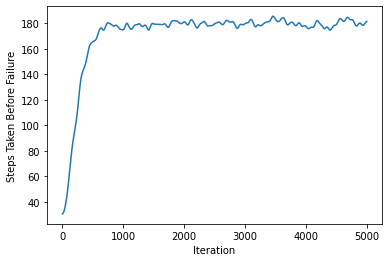

In [21]:
rSmoothed = gaussian_filter1d(rList, sigma=30)
plt.plot(range(num_episodes), rSmoothed)
plt.xlabel('Iteration')
plt.ylabel('Steps Taken Before Failure')
plt.show()